# Text Mining Assignment 1

#### Packages and Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import spacy

/Users/tianying/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tianying/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to /Users/tianying/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tianying/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/tianying/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 12.6 MB/s eta 0:00:0000:0100:01
    extract-msg (<=0.29.*)
                 ~~~~~~~^
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
tbbt = pd.read_csv("/Users/tianying/Documents/Statistics and Data Science/Course/Text Mining/Project 1/Scripts TBBT.csv")

#### Data Preparation

In [5]:
leonard = tbbt[tbbt["person_scene"] == "Leonard"]
leonard.head(10)

,episode_name,dialogue,person_scene
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard
15,Series 01 Episode 01 – Pilot Episode,"What, are you kidding? You’re a semi-pro.",Leonard
17,Series 01 Episode 01 – Pilot Episode,"Sheldon, this was your idea. A little extra m...",Leonard
19,Series 01 Episode 01 – Pilot Episode,I’m sure she’ll still love him.,Leonard
21,Series 01 Episode 01 – Pilot Episode,"Well, what do you want to do?",Leonard
23,Series 01 Episode 01 – Pilot Episode,Okay.,Leonard


In [6]:
### Process Text

#Functions for text processing (Removing stopwords and applying PorterStemmer)
def remove_stopwords(words):
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))    
    # Filter out the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

def stemmer(words):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

#Tokenize sentences
leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))

#Delete punctuation
leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))

#Tokenize Words
leonard["words"] = leonard["dialogue"].apply(lambda x : word_tokenize(x))

#Removing Stopwords
leonard["words"] = leonard["words"].apply(lambda x : remove_stopwords(x))

# POS Tagging and NER

def pos_tagging(words):
    # Join the words list back into a single string
    text = " ".join(words)
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]    
    return pos_tags

def ner(words):
    text = " ".join(words)
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

leonard["POS"] = leonard["words"].apply(lambda x : pos_tagging(x)) 
leonard["NER"] = leonard["words"].apply(lambda x : ner(x)) 

#Lowercase
def lowercasing(words):
    lowercased = [word.lower() for word in words]
    return lowercased
leonard["words"] = leonard["words"].apply(lambda x : lowercasing(x))

#Applying PorterStemmer
leonard["words"] = leonard["words"].apply(lambda x : stemmer(x))

/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2989565594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))
/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2989565594.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))
/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2989565594.py:23: Setting

### Question 1

##### Sentences and words per episode

In [7]:
#Making columns for number of sentences and words
leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))

#Group by episode, sum and make mean
print(leonard.groupby('episode_name')['nr_sentences'].sum().mean())
print(leonard.groupby('episode_name')['nr_words'].sum().mean())

61.926406926406926
209.39826839826839


/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/4024592200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/4024592200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))


In [10]:
leonard.head(10)

,episode_name,dialogue,person_scene,sentences,words,POS,NER,nr_sentences,nr_words
2,Series 01 Episode 01 – Pilot Episode,Agreed whats your point,Leonard,"[ Agreed, what’s your point?]","[agre, what, point]","[(Agreed, VERB), (what, PRON), (s, VERB), (poi...",[],1,3
4,Series 01 Episode 01 – Pilot Episode,Excuse me,Leonard,[ Excuse me?],[excus],"[(Excuse, VERB)]",[],1,1
6,Series 01 Episode 01 – Pilot Episode,One across is Aegean eight down is Nabakov tw...,Leonard,"[ One across is Aegean, eight down is Nabakov,...","[one, across, aegean, eight, nabakov, twentysi...","[(One, NUM), (across, ADP), (Aegean, PROPN), (...","[(One, CARDINAL), (Aegean, NORP), (Nabakov, NO...",3,24
8,Series 01 Episode 01 – Pilot Episode,Yes Um is this the High IQ sperm bank,Leonard,"[ Yes., Um, is this the High IQ sperm bank?]","[ye, um, high, iq, sperm, bank]","[(Yes, INTJ), (Um, INTJ), (High, ADJ), (IQ, PR...",[],2,6
12,Series 01 Episode 01 – Pilot Episode,Thankyou Well be right back,Leonard,"[ Thank-you., We’ll be right back.]","[thankyou, well, right, back]","[(Thankyou, PROPN), (Well, INTJ), (right, ADV)...",[],2,4
15,Series 01 Episode 01 – Pilot Episode,What are you kidding Youre a semipro,Leonard,"[ What, are you kidding?, You’re a semi-pro.]","[kid, your, semipro]","[(kidding, VERB), (You, PRON), (re, AUX), (sem...",[],2,3
17,Series 01 Episode 01 – Pilot Episode,Sheldon this was your idea A little extra mon...,Leonard,"[ Sheldon, this was your idea., A little extra...","[sheldon, idea, littl, extra, money, get, frac...","[(Sheldon, ADJ), (idea, NOUN), (little, ADJ), ...","[(Sheldon, ORG), (T1, CARDINAL)]",2,10
19,Series 01 Episode 01 – Pilot Episode,Im sure shell still love him,Leonard,[ I’m sure she’ll still love him.],"[im, sure, shell, still, love]","[(I, PRON), (m, VERB), (sure, ADJ), (shell, NO...",[],1,5
21,Series 01 Episode 01 – Pilot Episode,Well what do you want to do,Leonard,"[ Well, what do you want to do?]","[well, want]","[(Well, INTJ), (want, VERB)]",[],1,2
23,Series 01 Episode 01 – Pilot Episode,Okay,Leonard,[ Okay.],[okay],"[(Okay, INTJ)]",[],1,1


##### Variation across seasons

In [11]:
#Group by season, make mean of sums of sentences
leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])
print(leonard.groupby(['Season', 'episode_name'])['nr_sentences'].sum().groupby('Season').mean())

Season
Series 01    91.764706
Series 02    78.695652
Series 03    75.739130
Series 04    66.541667
Series 05    61.291667
Series 06    53.416667
Series 07    54.208333
Series 08    54.208333
Series 09    49.875000
Series 10    43.500000
Name: nr_sentences, dtype: float64


/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2356514820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])


In [12]:
#Group by season, make mean of sums of words
print(leonard.groupby(['Season', 'episode_name'])['nr_words'].sum().groupby('Season').mean())

Season
Series 01    348.058824
Series 02    267.000000
Series 03    242.739130
Series 04    205.000000
Series 05    199.875000
Series 06    179.875000
Series 07    182.250000
Series 08    188.625000
Series 09    167.500000
Series 10    157.291667
Name: nr_words, dtype: float64


#### Question 2

##### Data Processing

In [13]:
#Take nouns and person names from POS and NER
def select_nouns(pos):
    nouns = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() != "penny":
            nouns.append(tuplee[0])
    return nouns

def select_personnames(ner):
    person_names = []
    for tuplee in ner:
        if tuplee[1] == "PERSON":
            person_names.append(tuplee[0])
    return person_names

def add_penny(pos):
    times_penny = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() == "penny":
            times_penny.append("penny")
    return times_penny

            
leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
leonard['penny'] = leonard["POS"].apply(lambda x : add_penny(x))
leonard['personnames'] = leonard.apply(lambda row : row['personnames'] + row['penny'], axis = 1)

#Apply lowercasing again for both nouns and person names
leonard["nouns"] = leonard["nouns"].apply(lambda x : lowercasing(x))
leonard["personnames"] = leonard["personnames"].apply(lambda x : lowercasing(x))

#Collect a list with all nouns and a list with all person names
def collect(colname):
    list_all = []
    for listt in leonard[colname]:
        list_all.extend(listt)
    return list_all

/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2746861802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2746861802.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/2746861802.py:26: SettingWithCopyWarning:

##### How many nouns and person names are mentioned?

In [14]:
allnouns = collect("nouns")
print("Number of nouns mentioned:")
print(len(allnouns))
print("Number of unique nouns mentioned:")
print(len(set(allnouns)))

allnames = collect("personnames")
print("Number of person names mentioned:")
print(len(allnames))
print("Number of unique person names mentioned:")
print(len(set(allnames)))


Number of nouns mentioned:
12694
Number of unique nouns mentioned:
3527
Number of person names mentioned:
1336
Number of unique person names mentioned:
589


##### Wordclouds and Barcharts for nouns and person names

In [15]:
#Count occurrences of each word and name
nouncounts = Counter(allnouns)
namecounts = Counter(allnames)

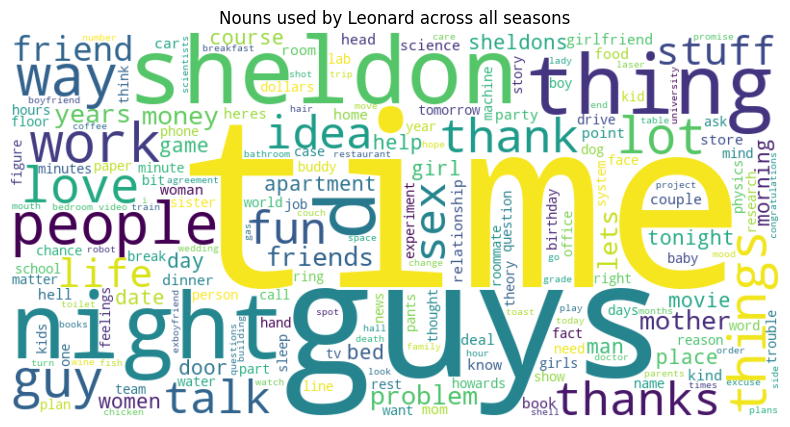

In [16]:
# Generate word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nouncounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nouns used by Leonard across all seasons")
plt.axis("off")
plt.show()

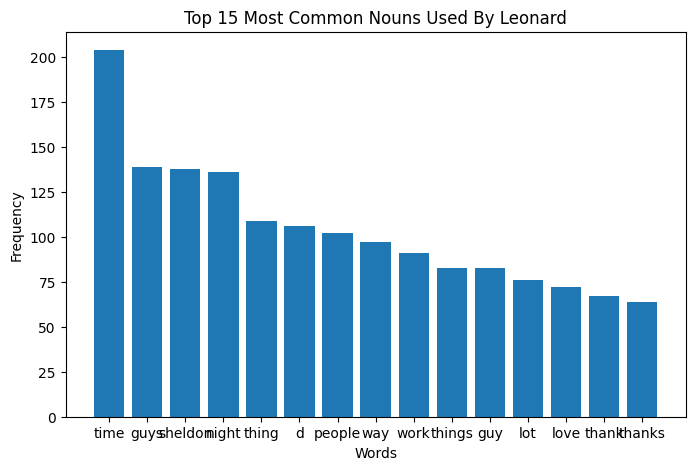

In [21]:
#Generate bar chart for nouns
top_15_nouns = nouncounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_nouns)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Nouns Used By Leonard')
plt.show()

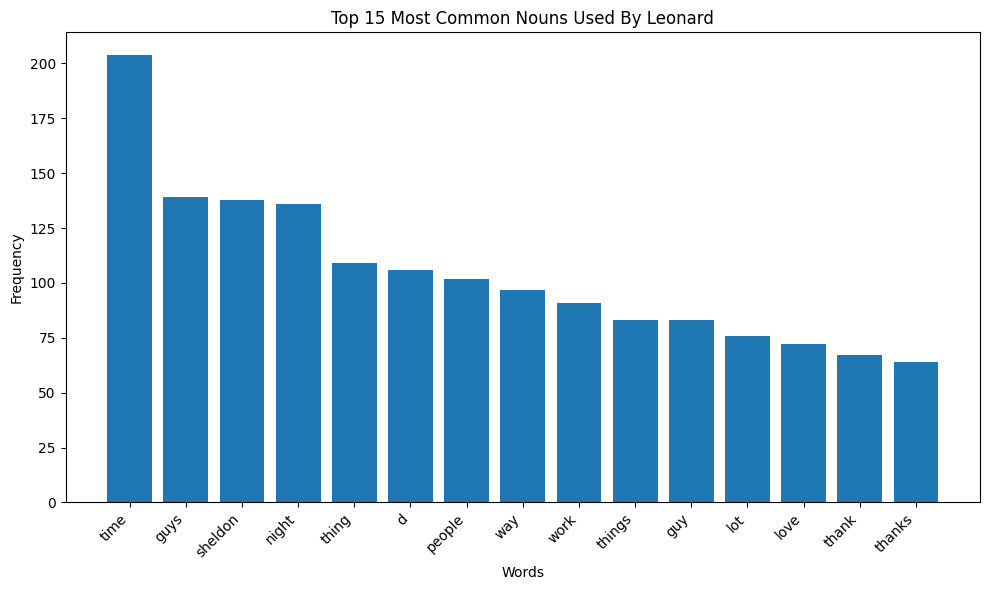

In [22]:
# Plot the bar chart
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Nouns Used By Leonard')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to ensure labels fit within the figure
plt.tight_layout()

# Display the plot
plt.show()

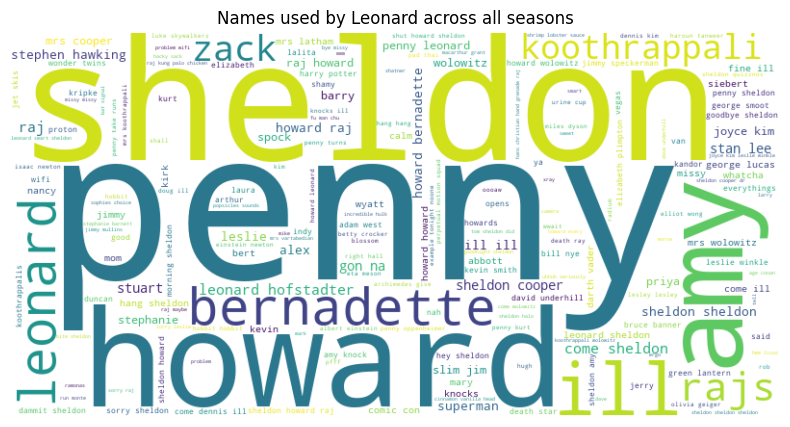

In [23]:
# Generate word cloud for names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(namecounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Names used by Leonard across all seasons")
plt.axis("off")
plt.show()

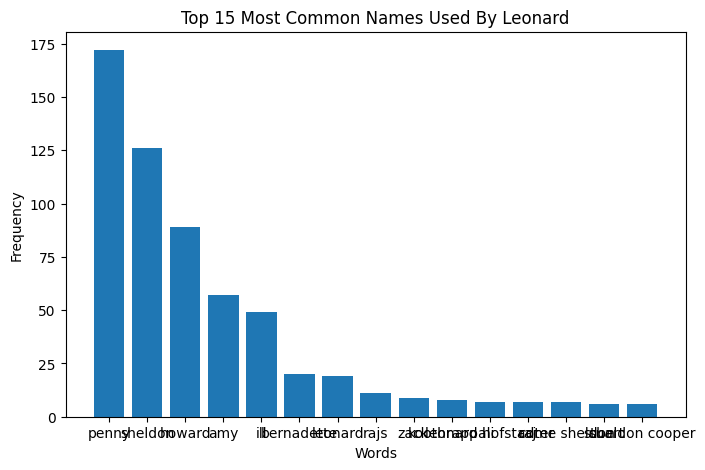

In [24]:
#Generate bar chart for names
top_15_names = namecounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_names)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Names Used By Leonard')
plt.show()

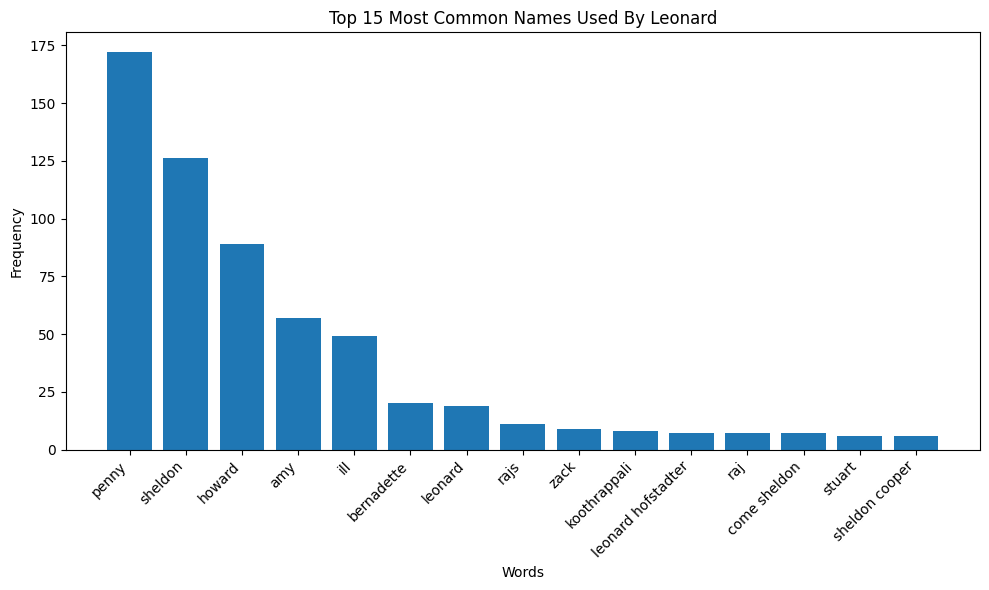

In [25]:
# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Names Used By Leonard')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to ensure labels fit within the figure
plt.tight_layout()

# Display the plot
plt.show()

## Question 4

### Create Word-Word Co-occurrence Matrix

In [64]:
leonard = tbbt[tbbt["person_scene"] == "Leonard"]
leonard.head(10)

,episode_name,dialogue,person_scene
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard
15,Series 01 Episode 01 – Pilot Episode,"What, are you kidding? You’re a semi-pro.",Leonard
17,Series 01 Episode 01 – Pilot Episode,"Sheldon, this was your idea. A little extra m...",Leonard
19,Series 01 Episode 01 – Pilot Episode,I’m sure she’ll still love him.,Leonard
21,Series 01 Episode 01 – Pilot Episode,"Well, what do you want to do?",Leonard
23,Series 01 Episode 01 – Pilot Episode,Okay.,Leonard


In [65]:
#Tokenize sentences
leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))


/var/folders/3h/83jfd71114x78b1sj0_llf1m0000gp/T/ipykernel_18643/1923280839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))


In [66]:
# Flatten the sentences into a single column
leonard_exploded = leonard.explode("sentences")
leonard_exploded.head()

,episode_name,dialogue,person_scene,sentences
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,"Agreed, what’s your point?"
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,Excuse me?
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,"One across is Aegean, eight down is Nabakov, ..."
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,"See, Papa Doc’s capital idea, that’s Port-au-P..."
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,Haiti.


In [118]:
#Delete punctuation
leonard_exploded["sentences"] = leonard_exploded["sentences"].apply(lambda x : re.sub(r"[^\w\s]", "", x))

#Tokenize Words
leonard_exploded["words"] = leonard_exploded["sentences"].apply(lambda x : word_tokenize(x))


In [119]:
#Applying PorterStemmer
leonard_exploded["words"] = leonard_exploded["words"].apply(lambda x : stemmer(x))

In [120]:
leonard_exploded.head()

,episode_name,dialogue,person_scene,sentences,words
2,Series 01 Episode 01 – Pilot Episode,Agreed whats your point,Leonard,Agreed whats your point,"[agre, what, your, point]"
4,Series 01 Episode 01 – Pilot Episode,Excuse me,Leonard,Excuse me,"[excus, me]"
6,Series 01 Episode 01 – Pilot Episode,One across is Aegean eight down is Nabakov tw...,Leonard,One across is Aegean eight down is Nabakov tw...,"[one, across, is, aegean, eight, down, is, nab..."
6,Series 01 Episode 01 – Pilot Episode,One across is Aegean eight down is Nabakov tw...,Leonard,See Papa Docs capital idea thats PortauPrince,"[see, papa, doc, capit, idea, that, portauprinc]"
6,Series 01 Episode 01 – Pilot Episode,One across is Aegean eight down is Nabakov tw...,Leonard,Haiti,[haiti]


In [121]:
leonard_exploded["words"] = leonard_exploded["words"].apply(
    lambda words: [word.lower() for word in words]
)

In [122]:
leonard_exploded["words"].head()

2                            [agre, what, your, point]
4                                          [excus, me]
6    [one, across, is, aegean, eight, down, is, nab...
6     [see, papa, doc, capit, idea, that, portauprinc]
6                                              [haiti]
Name: words, dtype: object

In [123]:
leonard_exploded["words"] = leonard_exploded["words"].apply(
    lambda words: ['<S>'] + words + ['<E>']  # Add <S> and <E> to the entire list of words
)

In [124]:
leonard_exploded["words"].head(10)

2                   [<S>, agre, what, your, point, <E>]
4                                 [<S>, excus, me, <E>]
6     [<S>, one, across, is, aegean, eight, down, is...
6     [<S>, see, papa, doc, capit, idea, that, porta...
6                                     [<S>, haiti, <E>]
8                                        [<S>, ye, <E>]
8     [<S>, um, is, thi, the, high, iq, sperm, bank,...
12                                 [<S>, thankyou, <E>]
12                    [<S>, well, be, right, back, <E>]
15                      [<S>, what, are, you, kid, <E>]
Name: words, dtype: object

In [125]:
df = pd.DataFrame(leonard_exploded["words"])
df.head()

,words
2,"[<S>, agre, what, your, point, <E>]"
4,"[<S>, excus, me, <E>]"
6,"[<S>, one, across, is, aegean, eight, down, is..."
6,"[<S>, see, papa, doc, capit, idea, that, porta..."
6,"[<S>, haiti, <E>]"


In [126]:
# Flatten the data to get a unique vocabulary
all_words = sorted(set(word for sentence in df['words'] for word in sentence))

In [127]:
# Create a mapping of words to indices
word_to_idx = {word: i for i, word in enumerate(all_words)}

# Initialize an empty co-occurrence matrix
co_occurrence_matrix = np.zeros((len(all_words), len(all_words)), dtype=int)

# Populate the co-occurrence matrix
for sentence in df['words']:
    for i in range(len(sentence) - 1):
        # Get indices for the current word and the next word
        word_idx_1 = word_to_idx[sentence[i]]
        word_idx_2 = word_to_idx[sentence[i + 1]]
        
        # Increment co-occurrence count for the pair
        co_occurrence_matrix[word_idx_1, word_idx_2] += 1
        co_occurrence_matrix[word_idx_2, word_idx_1] += 1  # Since it's symmetric

# Convert the matrix to a DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=all_words, columns=all_words)
co_occurrence_df

,000318914,1,10,100,104,10th,11,12,128,13,...,zebra,zelda,zen,zero,zerograv,zip,zod,zombi,zone,zoo
000318914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Flatten the co-occurrence DataFrame into word pairs with counts
pairs_with_counts = []
for i, word_i in enumerate(co_occurrence_df.index):
    for j, word_j in enumerate(co_occurrence_df.columns):
        if i < j:  # Avoid duplicates (symmetry)
            pairs_with_counts.append(((word_i, word_j), co_occurrence_df.iloc[i, j]))

# Sort by co-occurrence count in descending order
sorted_pairs = sorted(pairs_with_counts, key=lambda x: x[1], reverse=True)

# Get the top 5 word pairs with highest counts
top_5_pairs = sorted_pairs[:5]

# Display as a DataFrame
top_5_df = pd.DataFrame({
    "Word Pair": [f"{pair[0]} - {pair[1]}" for pair, _ in top_5_pairs],
    "Co-occurrence Count": [count for _, count in top_5_pairs]
})

print(top_5_df)


    Word Pair  Co-occurrence Count
0     <S> - i                 1151
1   <S> - you                  610
2  <S> - what                  590
3    <S> - oh                  583
4    <S> - no                  498


In [141]:
co_occurrence_df["skeleton"].iloc[20:40]

1930           0
1940           0
1946           0
1960           0
1969           0
1am            0
2              0
20             0
200            0
2000yearold    1
20channel      0
20th           0
21             0
21st           0
2328           0
24             0
247            0
25             0
250            0
26             0
Name: skeleton, dtype: int64

In [130]:
# Total number of word co-occurrences
total_co_occurrences = co_occurrence_matrix.sum()

# Probability of each word (marginal probabilities)
word_probabilities = co_occurrence_matrix.sum(axis=1) / total_co_occurrences

# Initialize the PPMI matrix
ppmi_matrix = np.zeros_like(co_occurrence_matrix, dtype=float)

# Compute PPMI values
for i in range(len(all_words)):
    for j in range(len(all_words)):
        joint_probability = co_occurrence_matrix[i, j] / total_co_occurrences
        if joint_probability > 0:  # Avoid log of zero
            pmi = np.log2(joint_probability / (word_probabilities[i] * word_probabilities[j]))
            ppmi_matrix[i, j] = max(pmi, 0)  # PPMI is non-negative

# Convert the PPMI matrix to a DataFrame for better readability
ppmi_df = pd.DataFrame(ppmi_matrix, index=all_words, columns=all_words)
ppmi_df


,000318914,1,10,100,104,10th,11,12,128,13,...,zebra,zelda,zen,zero,zerograv,zip,zod,zombi,zone,zoo
000318914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
ppmi_df["skeleton"].iloc[20:40]


1930            0.000000
1940            0.000000
1946            0.000000
1960            0.000000
1969            0.000000
1am             0.000000
2               0.000000
20              0.000000
200             0.000000
2000yearold    15.723194
20channel       0.000000
20th            0.000000
21              0.000000
21st            0.000000
2328            0.000000
24              0.000000
247             0.000000
25              0.000000
250             0.000000
26              0.000000
Name: skeleton, dtype: float64

In [132]:
# Flatten the PPMI matrix into word pairs with their PPMI values
pairs_with_ppmi = []
for i in range(len(all_words)):
    for j in range(len(all_words)):
        if i != j:  # Exclude self-pairs
            pairs_with_ppmi.append(((all_words[i], all_words[j]), ppmi_matrix[i, j]))

# Sort pairs by PPMI values in descending order
sorted_pairs = sorted(pairs_with_ppmi, key=lambda x: x[1], reverse=True)

# Get the top 5 word pairs with highest PPMI values
top_5_pairs = sorted_pairs[:5]

# Display the results
for pair, ppmi_value in top_5_pairs:
    print(f"Words: {pair}, PPMI: {ppmi_value}")


Words: ('100', 'sexisoffthet'), PPMI: 15.723194296594267
Words: ('104', 'section'), PPMI: 15.723194296594267
Words: ('15yearold', 'tee'), PPMI: 15.723194296594267
Words: ('18thcenturi', 'vienna'), PPMI: 15.723194296594267
Words: ('2000yearold', 'skeleton'), PPMI: 15.723194296594267


In [94]:
corpus = []  # Initialize an empty list to store the tokens

for sentence_token in leonard_exploded["words"]:
    corpus.append(sentence_token)  # Correctly append each token to the corpus



In [96]:
corpus

[['<S>', 'agreed', 'whats', 'your', 'point', '<E>'],
 ['<S>', 'excuse', 'me', '<E>'],
 ['<S>',
  'one',
  'across',
  'is',
  'aegean',
  'eight',
  'down',
  'is',
  'nabakov',
  'twentysix',
  'across',
  'is',
  'mcm',
  'fourteen',
  'down',
  'is',
  'move',
  'your',
  'finger',
  'phylum',
  'which',
  'makes',
  'fourteen',
  'across',
  'portauprince',
  '<E>'],
 ['<S>',
  'see',
  'papa',
  'docs',
  'capital',
  'idea',
  'thats',
  'portauprince',
  '<E>'],
 ['<S>', 'haiti', '<E>'],
 ['<S>', 'yes', '<E>'],
 ['<S>', 'um', 'is', 'this', 'the', 'high', 'iq', 'sperm', 'bank', '<E>'],
 ['<S>', 'thankyou', '<E>'],
 ['<S>', 'well', 'be', 'right', 'back', '<E>'],
 ['<S>', 'what', 'are', 'you', 'kidding', '<E>'],
 ['<S>', 'youre', 'a', 'semipro', '<E>'],
 ['<S>', 'sheldon', 'this', 'was', 'your', 'idea', '<E>'],
 ['<S>',
  'a',
  'little',
  'extra',
  'money',
  'to',
  'get',
  'fractional',
  't1',
  'bandwidth',
  'in',
  'the',
  'apartment',
  '<E>'],
 ['<S>', 'im', 'sure', 's